# Chapter 7

Problems 7.1, 7.2, 7.3, 7.4, 7.5, A1

## 7.1:

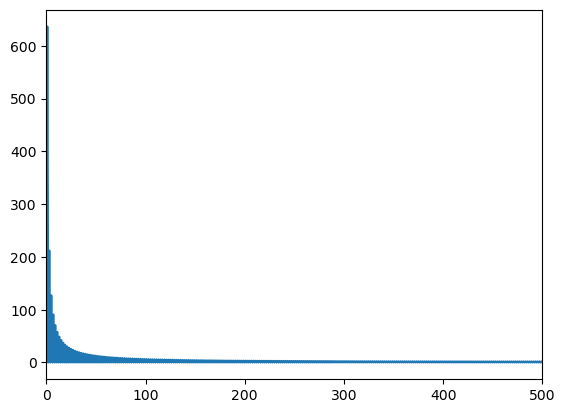

In [1]:
# part a

from numpy import zeros,loadtxt
from pylab import plot,xlim,show
from cmath import exp,pi
import numpy as np
import matplotlib.pyplot as plt

# starting with Newman's dft.py and making changes

def dft(y):
    N = len(y)
    c = np.zeros(N//2+1, complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)
    return c

def square_wave(N):
    y = np.zeros(N)
    for i in range(N):
        if i < N//2:
            y[i] = 1
        else:
            y[i] = -1
    return y

N = 1000
y_square_wave = square_wave(N)
c_square_wave = dft(y_square_wave)

plt.plot(abs(c_square_wave))
plt.xlim(0, 500)
plt.show()

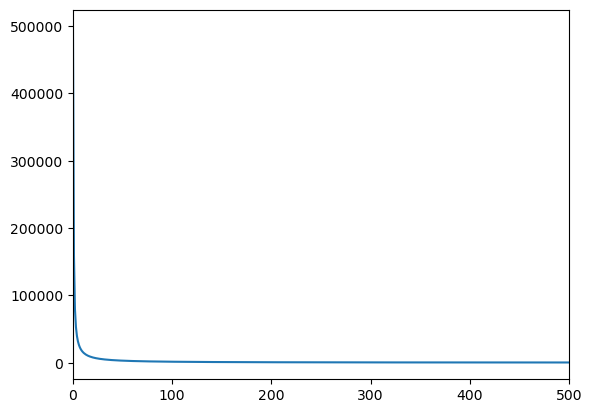

In [2]:
# part b

def sawtooth_wave(N):
    return np.arange(N)

N = 1000
y_sawtooth_wave = sawtooth_wave(N)
c_sawtooth_wave = dft(y_sawtooth_wave)

plt.plot(abs(c_sawtooth_wave))
plt.xlim(0, 500)
plt.show()

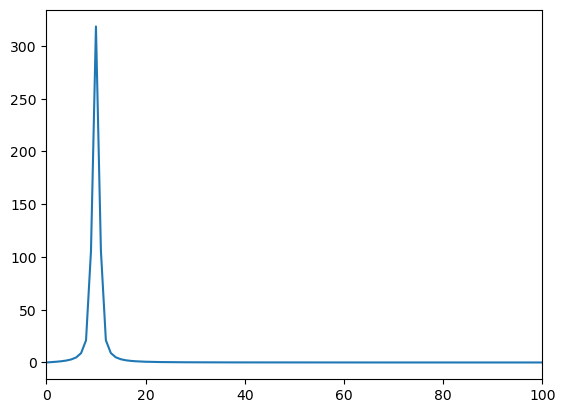

In [3]:
# part c

def modulated_sine_wave(N):
    return np.sin(np.pi*np.arange(N)/N) * np.sin(20*np.pi*np.arange(N)/N) #this is given by problem y_n = sin(πn/N) sin(20πn/N)

N = 1000
y_modulated_sine_wave = modulated_sine_wave(N)
c_modulated_sine_wave = dft(y_modulated_sine_wave)

plt.plot(abs(c_modulated_sine_wave))
plt.xlim(0, 100)
plt.show()

## 7.2:

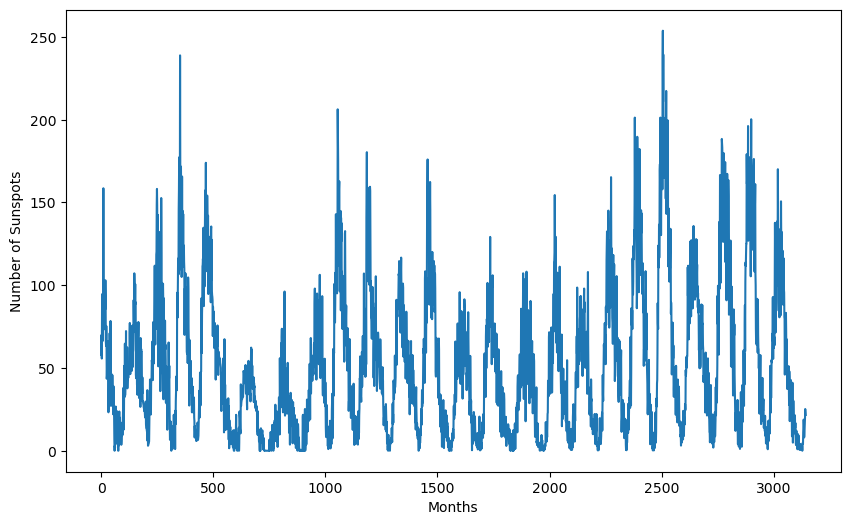

In [4]:
# part a

import matplotlib.pyplot as plt

# import data
sunspots_file = open("sunspots.txt", "r")
lines = sunspots_file.readlines()
sunspots_file.close()

months = []
sunspots = []

# get the month and sunspot # from each line
for line in lines:
    month, sunspot = map(float, line.split())
    months.append(month)
    sunspots.append(sunspot)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(months, sunspots)
plt.xlabel("Months")
plt.ylabel("Number of Sunspots")
plt.show()

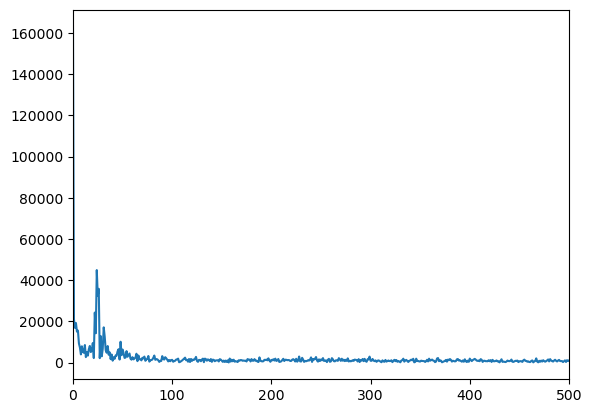

In [5]:
# part b

# Same idea as in Newman's example for Figure 7.3
y_sunspots = sunspots
c_sunspots = dft(y_sunspots)
plot(abs(c_sunspots))
xlim(0,500)
show()

In [6]:
# part c
frequencies = np.fft.fftfreq(len(y_sunspots), 1)
peak_index = np.argmax(np.abs(c_sunspots[1:])) + 1
approximate_value_of_k = frequencies[peak_index] * len(y_sunspots)
print("Approximate value of k:", approximate_value_of_k)

# Period of the sine wave with this value of k:
period = 2 * np.pi / approximate_value_of_k
print("Period of the sine wave (in months):", period)

Approximate value of k: 23.999999999999996
Period of the sine wave (in months): 0.26179938779914946


## 7.3:

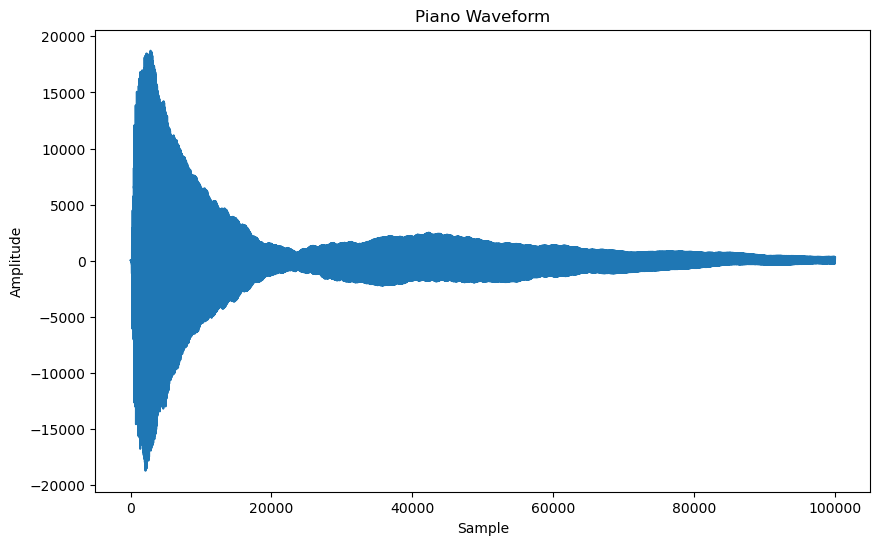

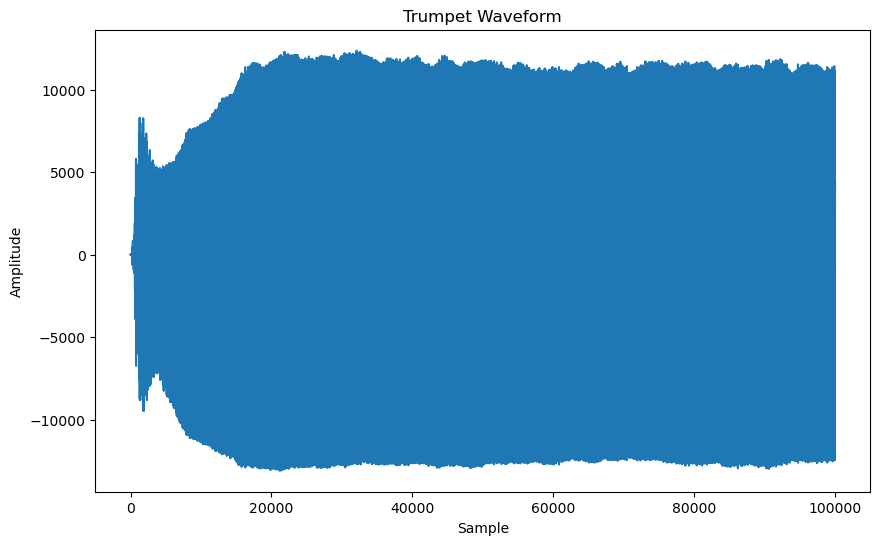

In [7]:
# part a

# this section just loads data and plots

# import data for piano
piano_file = loadtxt("piano.txt")
trumpet_file = loadtxt("trumpet.txt")


# Piano waveform
plt.figure(figsize=(10, 6))
plt.plot(piano_file)
plt.title('Piano Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

# Trumpet waveform
plt.figure(figsize=(10, 6))
plt.plot(trumpet_file)
plt.title('Trumpet Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

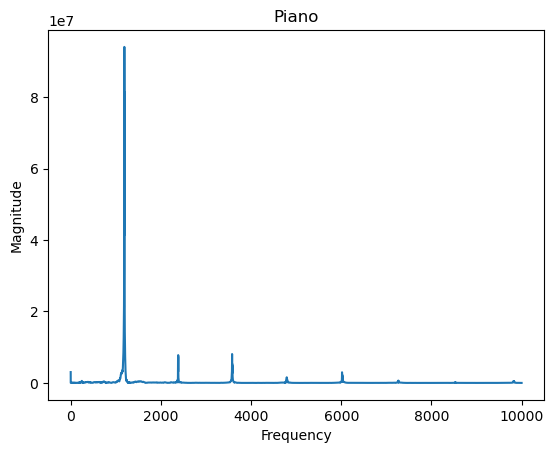

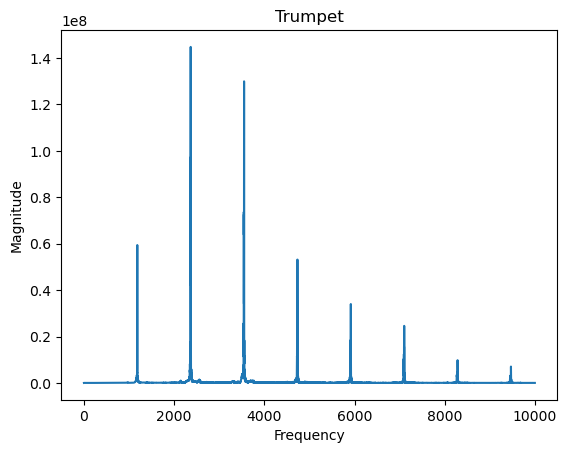

In [8]:
# this section does the fft

# Piano
y_piano = loadtxt("piano.txt")
c_piano = np.fft.fft(y_piano)[:10000]
plot(abs(c_piano))
plt.title('Piano')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()


# Trumpet
y_trumpet = loadtxt("trumpet.txt")
c_trumpet = np.fft.fft(y_trumpet)[:10000]
plot(abs(c_trumpet))
plt.title('Trumpet')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()


In [9]:
# Both the piano and trumpet have harmonic sounds, and the pitch is changing over time, a bigger
# in pitch in a smaller time for the piano while the trumpet has a gradual change over a larger time.

In [10]:
# part b

# The Hint gives that the musical note middle C has a frequency of 261Hz.

peak_index_piano = np.argmax(np.abs(c_piano[1:])) + 1
print("Piano Peak index:", peak_index_piano)
peak_magnitude_piano = np.abs(c_trumpet[peak_index_piano])
print("Piano Peak magnitude:", peak_magnitude_piano)

peak_index_trumpet = np.argmax(np.abs(c_trumpet[1:])) + 1
print("Trumpet Peak index:", peak_index_trumpet)
peak_magnitude_trumpet = np.abs(c_trumpet[peak_index_trumpet])
print("Trumpet Peak magnitude:", peak_magnitude_trumpet)

print()
print("The note played on the piano is likely below middle C.")
print("The note played on the trumpet is likely above middle C.")

Piano Peak index: 1190
Piano Peak magnitude: 3102049.4285059804
Trumpet Peak index: 2367
Trumpet Peak magnitude: 144800935.73863694

The note played on the piano is likely below middle C.
The note played on the trumpet is likely above middle C.


## 7.4:

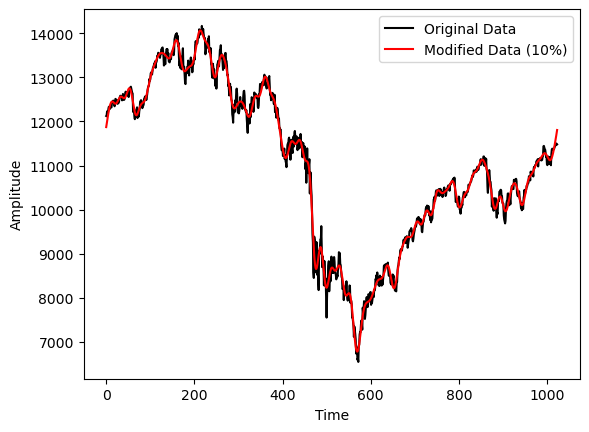

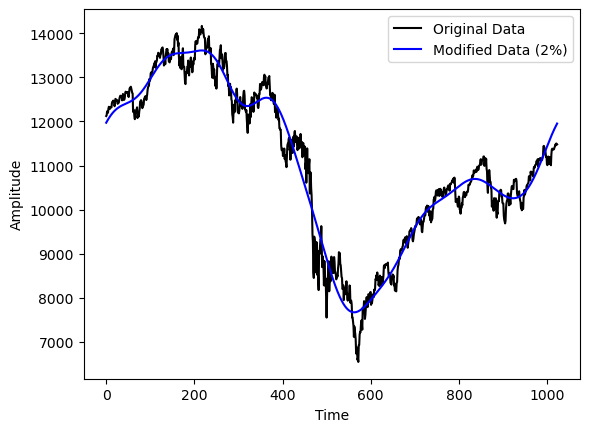

In [11]:
# part a,b

y_dow = loadtxt("dow.txt")
c_dow = np.fft.rfft(y_dow) # doing rfft as problem asks

# part c
c_dow_modified_10_percent = np.copy(c_dow)
c_dow_modified_10_percent[int(len(c_dow_modified_10_percent)*0.1):] = 0

# part d
y_dow_modified_10_percent = np.fft.irfft(c_dow_modified_10_percent)

# plotting
plt.plot(y_dow, label='Original Data', color='black')
plt.plot(y_dow_modified_10_percent, label='Modified Data (10%)', color='red')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# part e
c_dow_modified_2_percent = np.copy(c_dow)
c_dow_modified_2_percent[int(len(c_dow_modified_2_percent)*0.02):] = 0

# calculating inverse FT
y_dow_modified_2_percent = np.fft.irfft(c_dow_modified_2_percent)

# plotting
plt.plot(y_dow, label='Original Data', color='black')
plt.plot(y_dow_modified_2_percent, label='Modified Data (2%)', color='blue')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## 7.5:

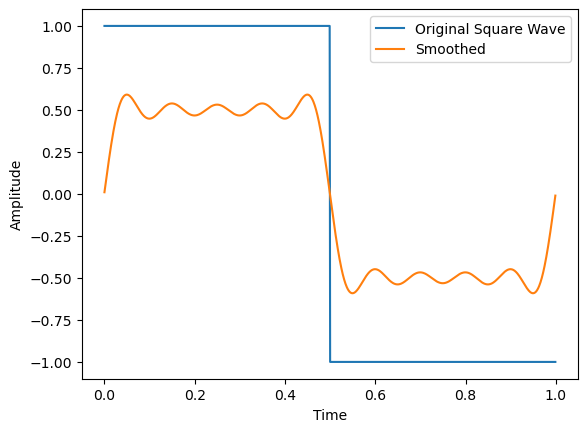

In [12]:
# an array that represents a single cycle of a square wave
N = 1000 
t = np.linspace(0, 1, N, endpoint=False)  # time array
f_t = np.where(np.floor(2*t) % 2 == 0, 1, -1)

# doing the dft
c = np.fft.fft(f_t)

# set all but first 10 Fourier coefficients to 0
c_new = np.copy(c)
c_new[10:] = 0

# inver the FT
f_smoothed = np.fft.ifft(c_new).real # taking real removes imaginary part

# plot
plt.plot(t, f_t, label='Original Square Wave')
plt.plot(t, f_smoothed, label='Smoothed')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## A1 (additional problem): 

The file co2_mm_mio_Spr24.txt is a recent download of data from https://gml.noaa.gov/ccgg/trends/.  Besides the (mostly) linear trend in the data, there is an annual cycle in the CO2 concentration resulting from

1: Write code to read in the data and plot the entire time series (monthly average versus decimal date). 

2: Modify the code to just show the most recent 20 years of data.  (2nd plot)

3: Write code that removes the long term trend so that all you have is the annual cycle. Options for this are (a) subtract a low-order polynomial fit (you can use np.polyfit() for this), or to subtract a smoothed version of the time series (remember the problem from chapter 3).  If you go the second route, you will want to pick a smoothing 'boxcar' length that is 1 or 2 annual cycles in length. Plot the "residual" time series in a top panel and a Fourier transform in the bottom panel (stacked plot).  Discuss the frequency that you find - is it what you expected?

4: Now, let's do a similar thing using Fourier filtering.  First, write a program that removes the annual cycle from the data.  Remove the cycle by transforming into the frequency domain, zeroing the appropriate values, and transforming back (you can use either dft.py or rfft from Numpy).  Plot both the filtered and unfiltered data on a single plot.

5: Now repeat the previous part, but remove the long-term trend from the data using Fourier Filtering, and plot this residual time series together with the one you did in part 3.  Offset the curves in a single plot, and discuss any similarities or differences. 


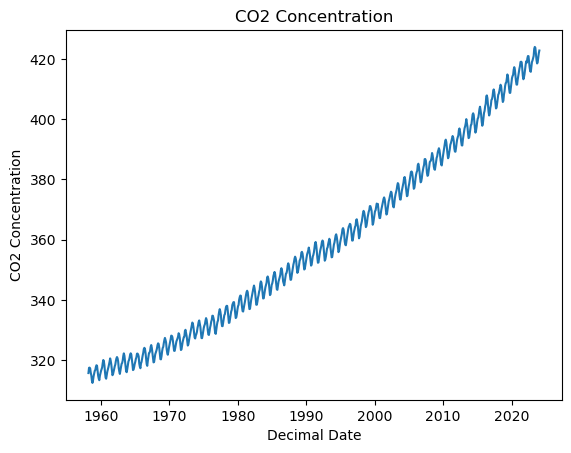

In [13]:
CO2_data = np.loadtxt("co2_mm_mio_Spr24.txt")

decimal_date = CO2_data[:, 2]
co2_concentration = CO2_data[:, 3]

# plotting
plt.figure()
plt.plot(decimal_date, co2_concentration)
plt.xlabel("Decimal Date")
plt.ylabel("CO2 Concentration")
plt.title("CO2 Concentration")
plt.show()

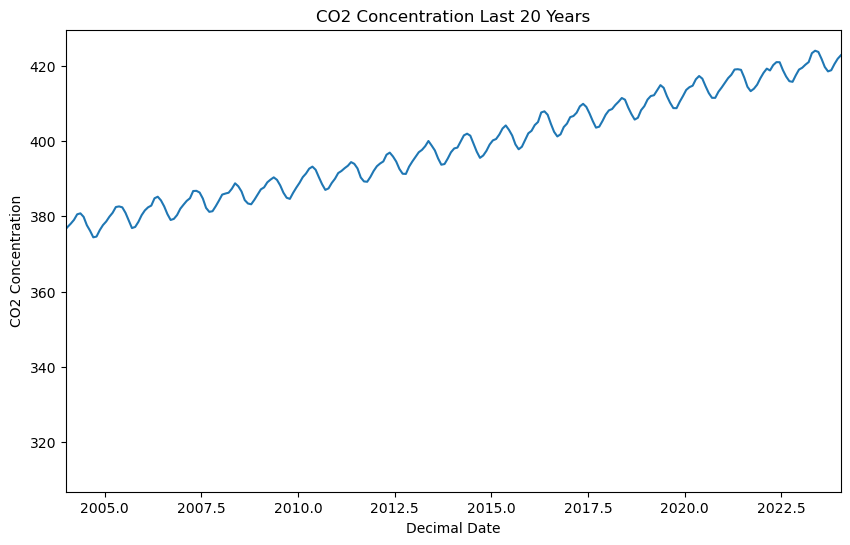

In [14]:
# Most recent 20 years of data
# plotting
plt.figure(figsize=(10, 6))
plt.plot(decimal_date, co2_concentration)
plt.xlabel("Decimal Date")
plt.xlim(2004, 2024.0417)
plt.ylabel("CO2 Concentration")
plt.title("CO2 Concentration Last 20 Years")
plt.show()

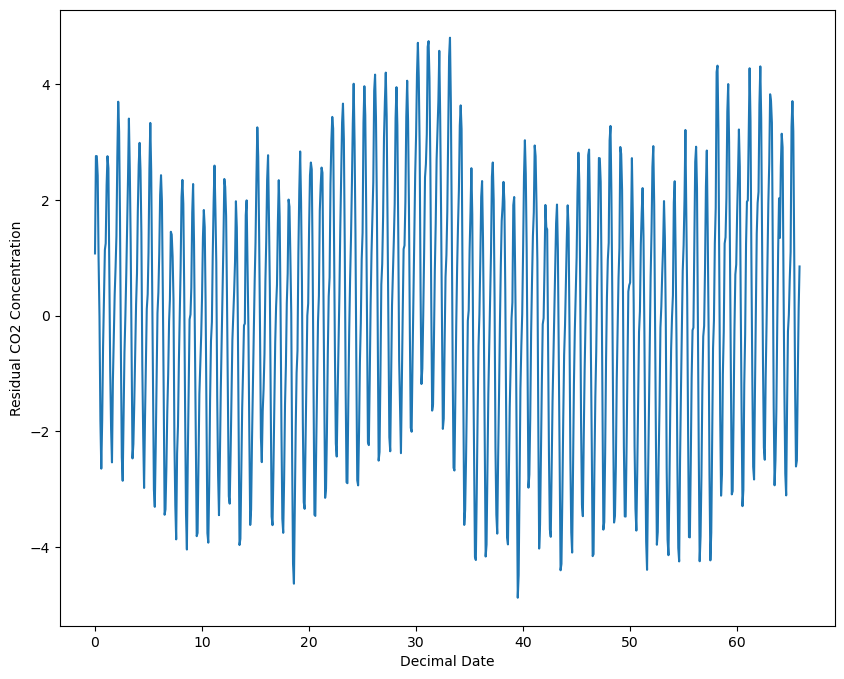

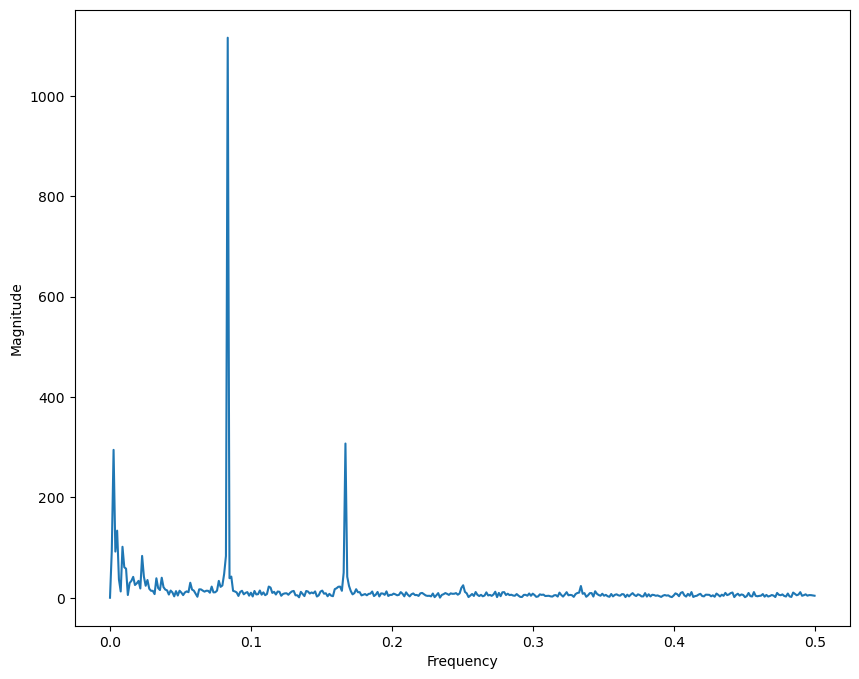

In [15]:
# Remove the long-term trend
time = decimal_date - decimal_date[0]
coefficients = np.polyfit(time, co2_concentration, 2)
trend = np.polyval(coefficients, time)
short_trend = co2_concentration - trend

# do the fft
fourier_transform = np.fft.rfft(short_trend)
frequencies = np.fft.rfftfreq(len(short_trend), 1)

# Plot residual
plt.figure(figsize=(10, 8))
plt.plot(time, short_trend)
plt.xlabel("Decimal Date")
plt.ylabel("Residual CO2 Concentration")

# Residual FT
plt.figure(figsize=(10, 8))
plt.plot(frequencies, np.abs(fourier_transform))
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

In [16]:
# This should be what is expected after removing the long trend.

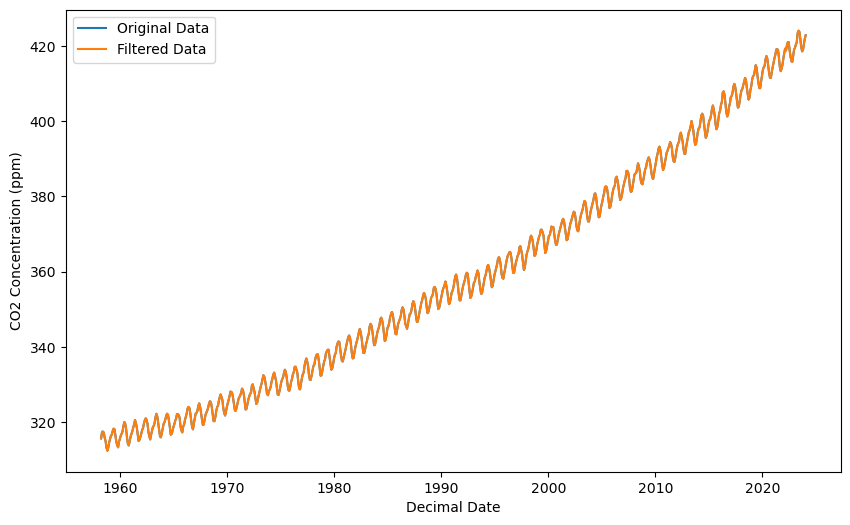

In [17]:
annual_frequency = 1 / 12  # frequency
fourier_transform = np.fft.fft(co2_concentration) # the fft

# zero
filter_indices = np.where(np.abs(frequencies) == annual_frequency)
fourier_transform_filtered = np.copy(fourier_transform)
fourier_transform_filtered[filter_indices] = 0

# inverse FT
co2_concentration = np.fft.ifft(fourier_transform_filtered).real

plt.figure(figsize=(10, 6))
plt.plot(decimal_date, co2_concentration, label="Original Data")
plt.plot(decimal_date, co2_concentration, label="Filtered Data")
plt.xlabel("Decimal Date")
plt.ylabel("CO2 Concentration (ppm)")
plt.legend()
plt.show()

In [18]:
# The original and filtered are exactly the same and overlap.

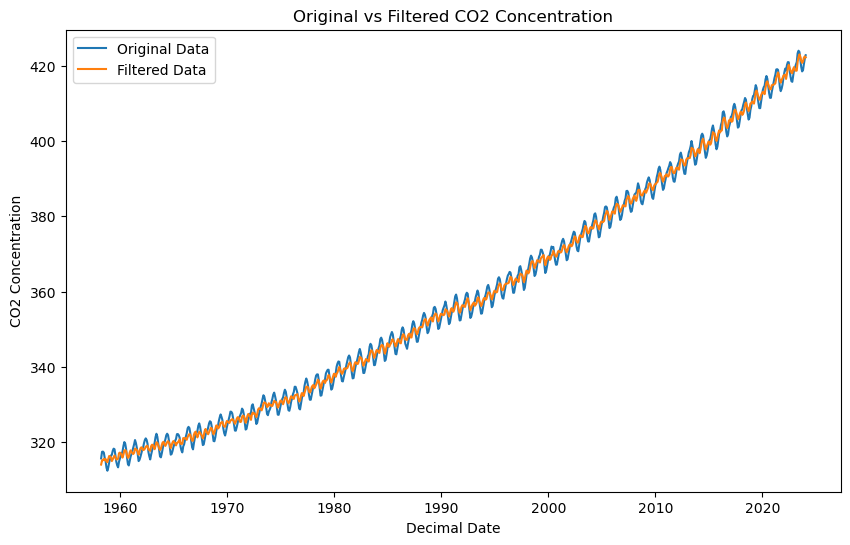

In [19]:
fourier_transform = np.fft.rfft(co2_concentration)
frequencies = np.fft.rfftfreq(len(co2_concentration))
one_year_cycle = np.argmax(frequencies > 1/12)
fourier_transform[one_year_cycle] = 0

# inverse FFT
filtered_signal = np.fft.irfft(fourier_transform, len(co2_concentration))

# plot
plt.figure(figsize=(10, 6))
plt.plot(decimal_date, co2_concentration, label='Original Data')
plt.plot(decimal_date, filtered_signal, label='Filtered Data')
plt.xlabel('Decimal Date')
plt.ylabel('CO2 Concentration')
plt.title('Original vs Filtered CO2 Concentration')
plt.legend()
plt.show()


In [20]:
# The trend is very similar to the original data trend, just that the
# small increase and decrease cannot be seen in filtered.